In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [83]:
import pandas.tseries

In [84]:
df = pd.read_csv('AirPassengers.csv')
passengers = pd.Series(df['#Passengers'],dtype = 'float')
passengers.index = pd.to_datetime(df['Month'])

In [85]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [86]:
passengers

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
1950-01-01    115.0
1950-02-01    126.0
1950-03-01    141.0
1950-04-01    135.0
1950-05-01    125.0
1950-06-01    149.0
1950-07-01    170.0
1950-08-01    170.0
1950-09-01    158.0
1950-10-01    133.0
1950-11-01    114.0
1950-12-01    140.0
1951-01-01    145.0
1951-02-01    150.0
1951-03-01    178.0
1951-04-01    163.0
1951-05-01    172.0
1951-06-01    178.0
              ...  
1958-07-01    491.0
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(passengers)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

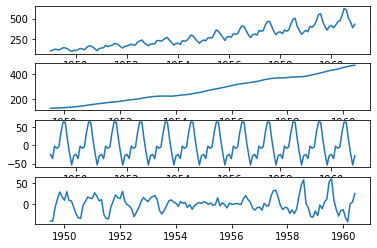

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(411)
plt.plot(passengers)


plt.subplot(412)
plt.plot(trend)

plt.subplot(413)
plt.plot(seasonal)

plt.subplot(414)
plt.plot(residual)



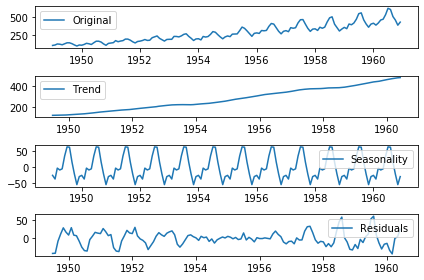

In [89]:
plt.subplot(411)
plt.plot(passengers, label='Original')
plt.legend(loc='best')

# trend のプロット
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

# seasonal のプロット
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

# residual のプロット
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [149]:
import itertools
p = d = q = range(0,3)
sp = sd = sq = range(0,2)
pdq = list(itertools.product(p,d,q))
s_pdq = list((x[0],x[1],x[2],12) for x in itertools.product(sp,sd,sq))
s_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [150]:
p = d = q = 2
sp = sd = sq = 1


sarima_model = sm.tsa.SARIMAX(passengers,order = (p,d,q), seasonal_order=(sp,sd,sq,12)
                             ,enforce_stationarity = False, enforce_invertibility = False).fit()

In [169]:
import warnings
warnings.filterwarnings('ignore')

score = pd.DataFrame(columns =['param','s_param','aic'])
for param in pdq:
    for s_param in s_pdq:
        try:
            model = sm.tsa.SARIMAX(passengers, order=param,seasonal_order=s_param, enforce_stationarity = False, enforce_invertibility=False).fit()
            score = score.append({'param':param,'s_param':s_param,'aic':model.aic},ignore_index=True)
            print('param:{}, s_param:{},aic:{}'.format(param,s_param,round(model.aic,3)))
        except:
            print('except {},{}'.format(param,s_param))
            continue


except (0, 0, 0),(0, 0, 0, 12)
param:(0, 0, 0), s_param:(0, 0, 1, 12),aic:1886.811
except (0, 0, 0),(0, 1, 0, 12)
param:(0, 0, 0), s_param:(0, 1, 1, 12),aic:1156.291
param:(0, 0, 0), s_param:(1, 0, 0, 12),aic:1118.626
param:(0, 0, 0), s_param:(1, 0, 1, 12),aic:1107.256
param:(0, 0, 0), s_param:(1, 1, 0, 12),aic:1109.244
param:(0, 0, 0), s_param:(1, 1, 1, 12),aic:1033.617
param:(0, 0, 1), s_param:(0, 0, 0, 12),aic:1846.079
param:(0, 0, 1), s_param:(0, 0, 1, 12),aic:1567.992
param:(0, 0, 1), s_param:(0, 1, 0, 12),aic:1196.998
param:(0, 0, 1), s_param:(0, 1, 1, 12),aic:1072.138
param:(0, 0, 1), s_param:(1, 0, 0, 12),aic:1071.003
param:(0, 0, 1), s_param:(1, 0, 1, 12),aic:1049.58
param:(0, 0, 1), s_param:(1, 1, 0, 12),aic:1059.511
param:(0, 0, 1), s_param:(1, 1, 1, 12),aic:985.335
param:(0, 0, 2), s_param:(0, 0, 0, 12),aic:1702.388
param:(0, 0, 2), s_param:(0, 0, 1, 12),aic:1477.015
param:(0, 0, 2), s_param:(0, 1, 0, 12),aic:1126.46
param:(0, 0, 2), s_param:(0, 1, 1, 12),aic:1007.324
param

param:(2, 0, 2), s_param:(0, 1, 1, 12),aic:924.822
param:(2, 0, 2), s_param:(1, 0, 0, 12),aic:1005.698
param:(2, 0, 2), s_param:(1, 0, 1, 12),aic:985.032
param:(2, 0, 2), s_param:(1, 1, 0, 12),aic:932.265
param:(2, 0, 2), s_param:(1, 1, 1, 12),aic:930.959
param:(2, 1, 0), s_param:(0, 0, 0, 12),aic:1378.746
param:(2, 1, 0), s_param:(0, 0, 1, 12),aic:1190.99
param:(2, 1, 0), s_param:(0, 1, 0, 12),aic:1008.553
param:(2, 1, 0), s_param:(0, 1, 1, 12),aic:930.131
param:(2, 1, 0), s_param:(1, 0, 0, 12),aic:1002.703
param:(2, 1, 0), s_param:(1, 0, 1, 12),aic:988.09
param:(2, 1, 0), s_param:(1, 1, 0, 12),aic:921.85
param:(2, 1, 0), s_param:(1, 1, 1, 12),aic:922.227
param:(2, 1, 1), s_param:(0, 0, 0, 12),aic:1361.386
param:(2, 1, 1), s_param:(0, 0, 1, 12),aic:1168.369
param:(2, 1, 1), s_param:(0, 1, 0, 12),aic:1010.553
param:(2, 1, 1), s_param:(0, 1, 1, 12),aic:935.204
param:(2, 1, 1), s_param:(1, 0, 0, 12),aic:998.858
param:(2, 1, 1), s_param:(1, 0, 1, 12),aic:988.253
param:(2, 1, 1), s_param:(

In [155]:
score

,param,s_param,aic
0,"(0, 0, 0)","(0, 0, 1, 12)",1886.810924
1,"(0, 0, 0)","(0, 1, 1, 12)",1156.291490
2,"(0, 0, 0)","(1, 0, 0, 12)",1118.625919
3,"(0, 0, 0)","(1, 0, 1, 12)",1107.256204
4,"(0, 0, 0)","(1, 1, 0, 12)",1109.243799
5,"(0, 0, 0)","(1, 1, 1, 12)",1033.617217
6,"(0, 0, 1)","(0, 0, 0, 12)",1846.078938
7,"(0, 0, 1)","(0, 0, 1, 12)",1567.991631
8,"(0, 0, 1)","(0, 1, 0, 12)",1196.998361
9,"(0, 0, 1)","(0, 1, 1, 12)",1072.138298


In [47]:
sarima_model.forecast('1970-01-01')

1961-01-01     452.330598
1961-02-01     421.196017
1961-03-01     463.406048
1961-04-01     492.144318
1961-05-01     510.868275
1961-06-01     566.639716
1961-07-01     656.858107
1961-08-01     641.626216
1961-09-01     547.843644
1961-10-01     496.628775
1961-11-01     431.547453
1961-12-01     473.801318
1962-01-01     492.702598
1962-02-01     460.976933
1962-03-01     498.764146
1962-04-01     532.335091
1962-05-01     549.522462
1962-06-01     607.539097
1962-07-01     697.994458
1962-08-01     681.038992
1962-09-01     586.260143
1962-10-01     536.800999
1962-11-01     469.285646
1962-12-01     510.996741
1963-01-01     531.534710
1963-02-01     499.995088
1963-03-01     541.008091
1963-04-01     571.700690
1963-05-01     590.283934
1963-06-01     647.051959
                 ...     
1967-08-01     906.352581
1967-09-01     812.927610
1967-10-01     763.600630
1967-11-01     697.989247
1967-12-01     740.769221
1968-01-01     761.570735
1968-02-01     730.821571
1968-03-01  

In [164]:
score.iloc[np.argmin(score['aic'])]

param          (0, 2, 2)
s_param    (0, 1, 1, 12)
aic              910.288
Name: 61, dtype: object

In [162]:
score.iloc[np.argmin(score['aic'])]['param']

(0, 2, 2)

In [163]:
score.iloc[np.argmin(score['aic'])]['s_param']

(0, 1, 1, 12)

In [165]:
model_best = sm.tsa.SARIMAX(passengers, order = score.iloc[np.argmin(score['aic'])]['param'],
                           seasonal_order=score.iloc[np.argmin(score['aic'])]['s_param'],
                           enforce_stationarity = False, enforce_invertibility=False).fit()

In [170]:
fcast = model_best.forecast('1970-01-01')

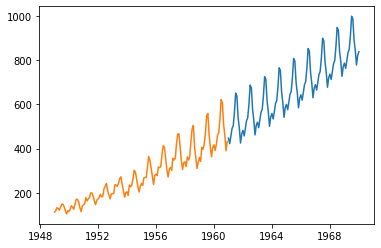

In [174]:
import matplotlib.pyplot as plt
plt.plot(fcast)
plt.plot(passengers)

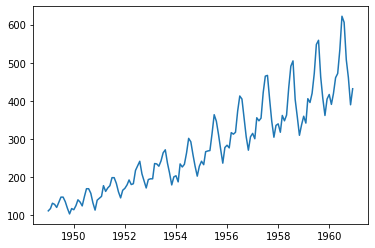

In [173]:
plt.plot(passengers)

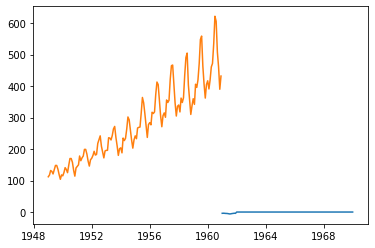

In [175]:
model_worst = sm.tsa.SARIMAX(passengers, order = score.iloc[np.argmax(score['aic'])]['param'],
                           seasonal_order=score.iloc[np.argmax(score['aic'])]['s_param'],
                           enforce_stationarity = False, enforce_invertibility=False).fit()
badcast = model_worst.forecast('1970-01-01')
plt.plot(badcast)
plt.plot(passengers)